## Assignment 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import datasets
sns.set()

In [2]:
iris_data=pd.read_csv(r'C:\Users\Meet\Downloads\iris_csv.csv')
iris_data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_data.info()
iris_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris_data[iris_data.duplicated()]

,sepallength,sepalwidth,petallength,petalwidth,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [5]:
iris_data.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [6]:
iris_data.value_counts('class')

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Visualization

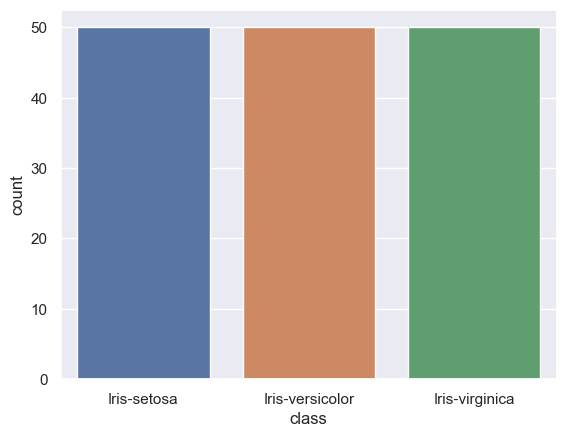

In [7]:
sns.countplot(x='class', data=iris_data, )
plt.show()

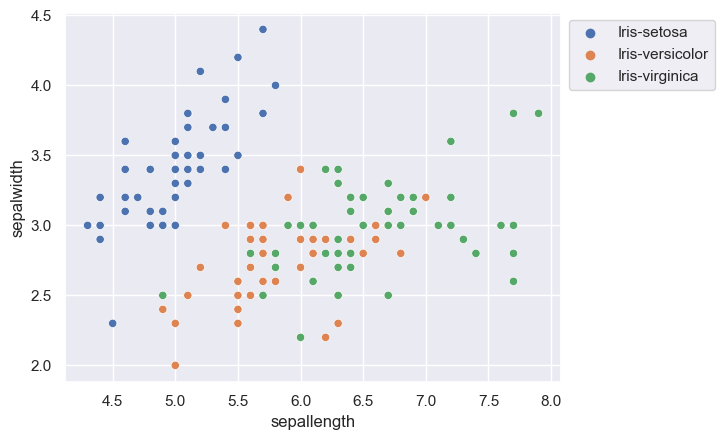

In [8]:
sns.scatterplot(x='sepallength', y='sepalwidth',hue='class', data=iris_data, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

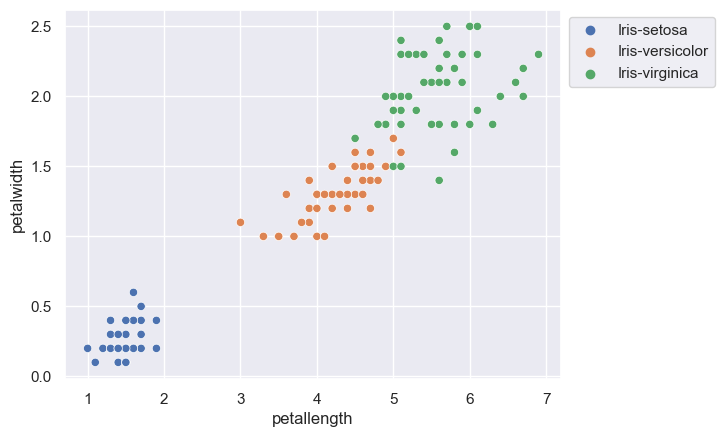

In [9]:
sns.scatterplot(x='petallength', y='petalwidth',hue='class', data=iris_data, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

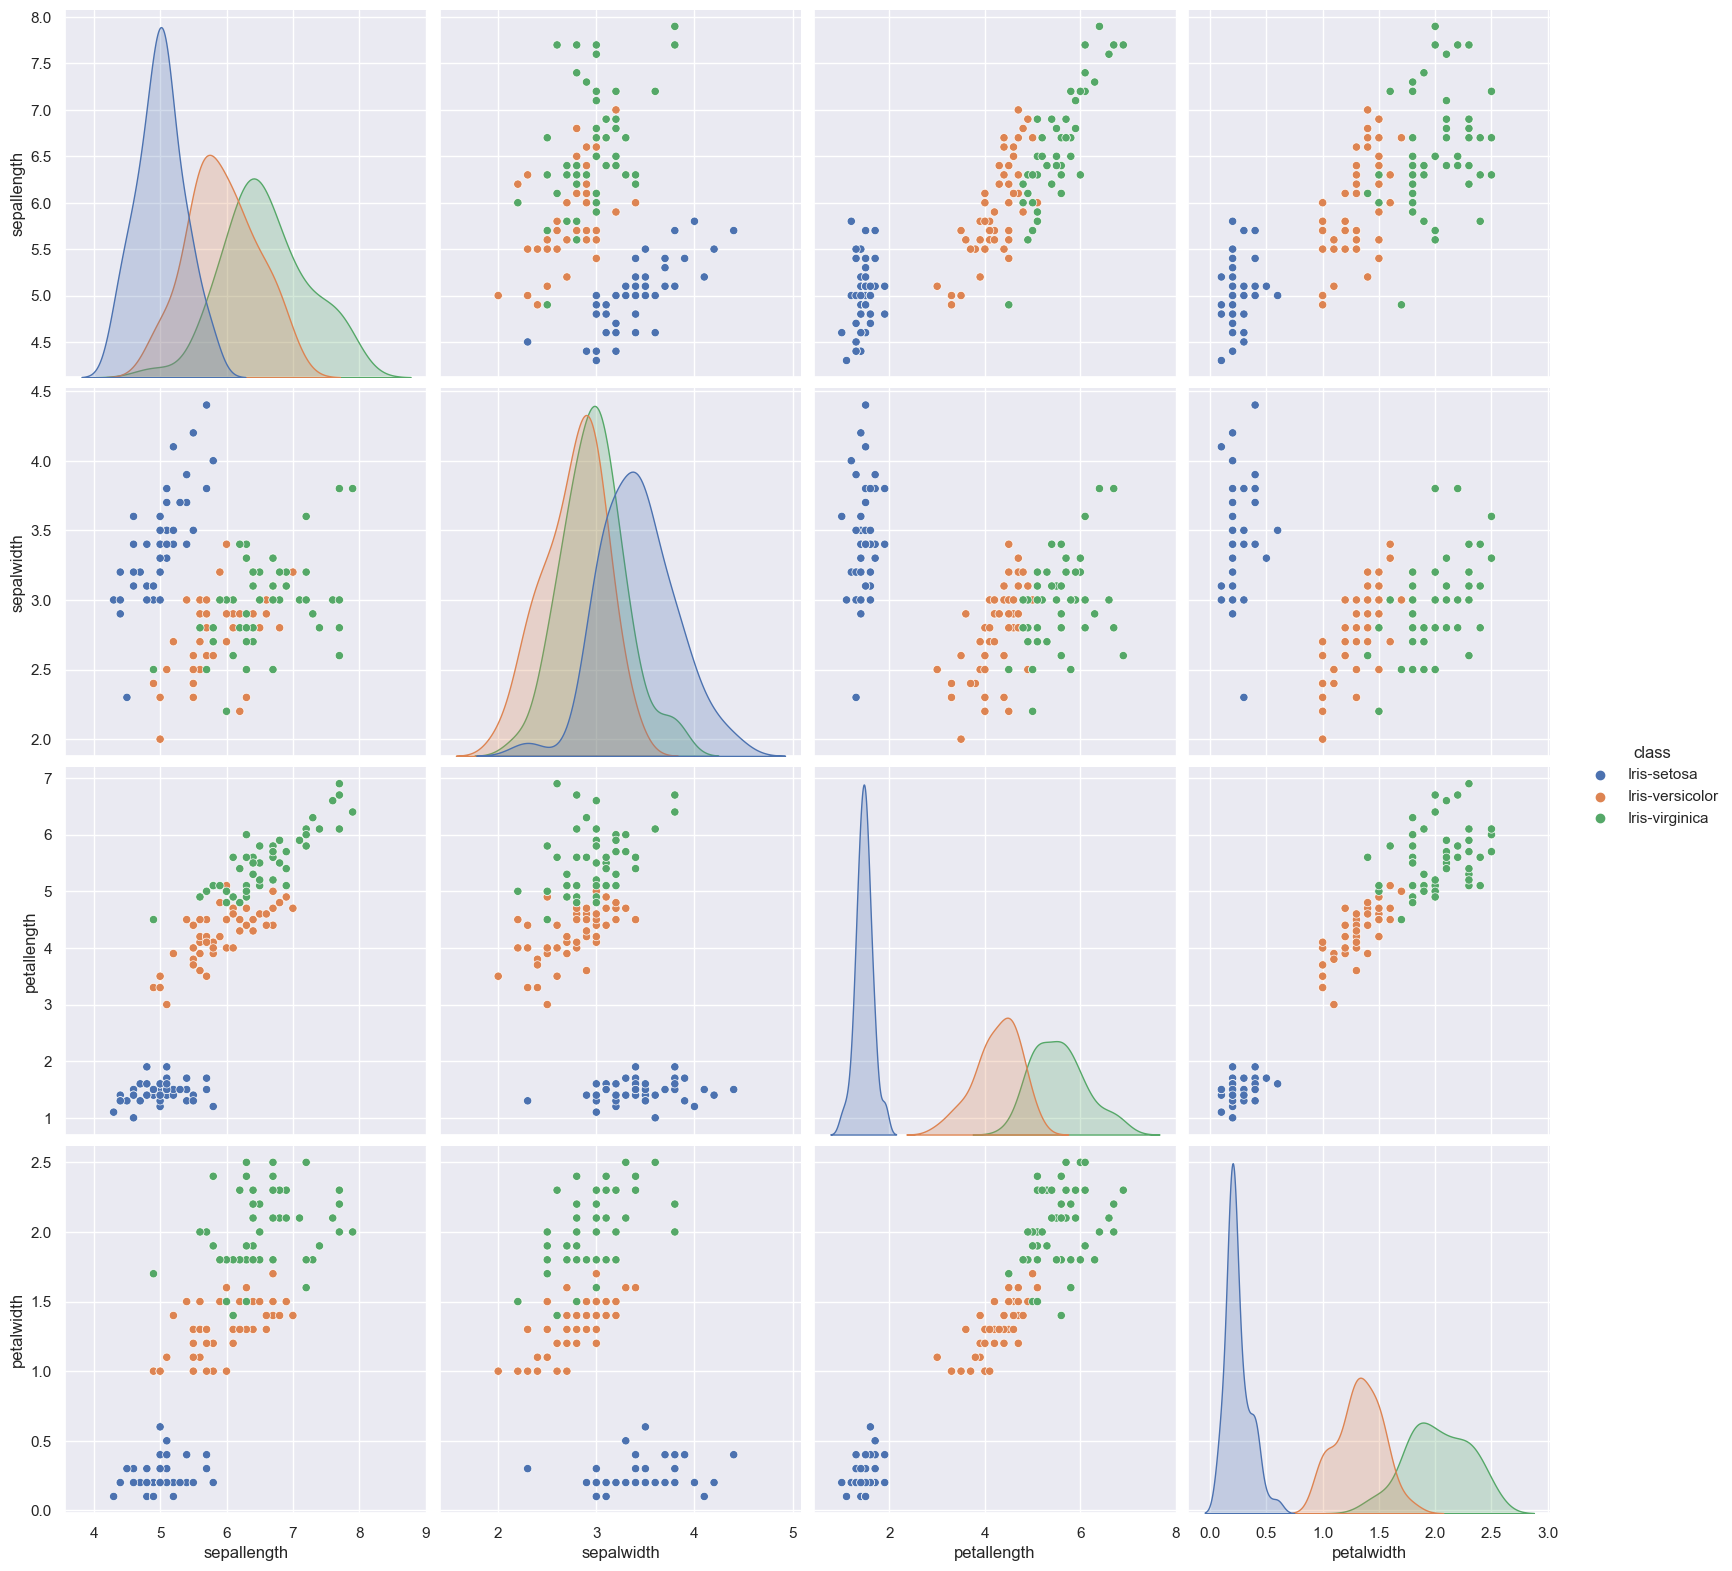

In [10]:
sns.pairplot(iris_data,hue='class',height=4)

[]

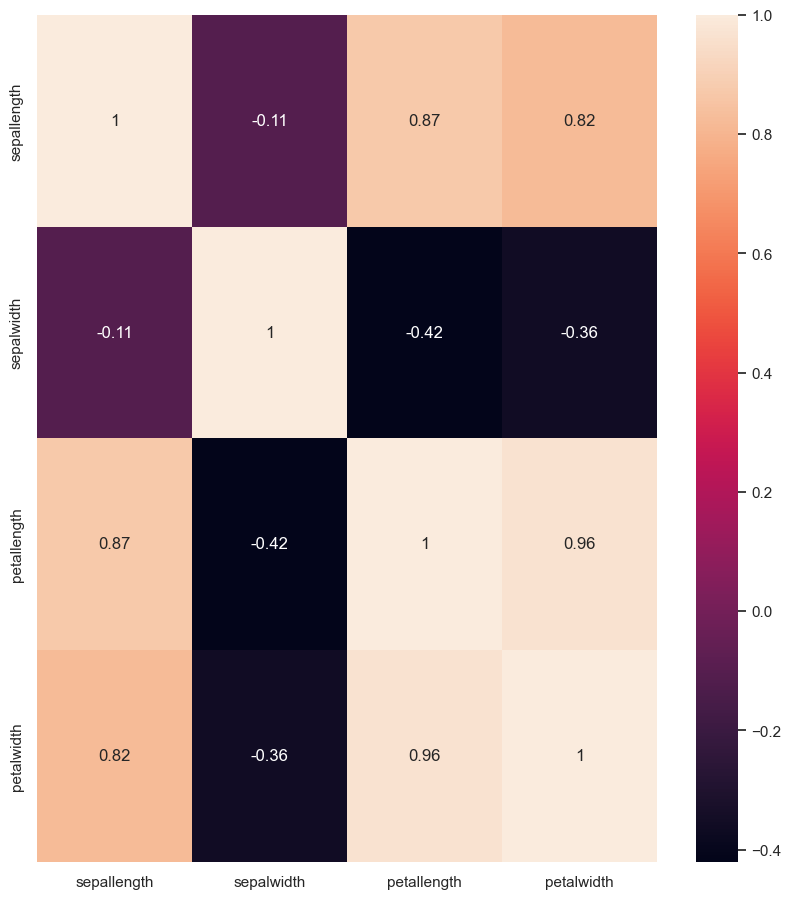

In [11]:
plt.figure(figsize=(10,11))
sns.heatmap(iris_data.corr(),annot=True)
plt.plot()

In [12]:
iris_data.groupby('class').agg(['mean', 'median'])

sepallength        sepalwidth        petallength         \
                       mean median       mean median        mean median   
class                                                                     
Iris-setosa           5.006    5.0      3.418    3.4       1.464   1.50   
Iris-versicolor       5.936    5.9      2.770    2.8       4.260   4.35   
Iris-virginica        6.588    6.5      2.974    3.0       5.552   5.55   

                petalwidth         
                      mean median  
class                              
Iris-setosa          0.244    0.2  
Iris-versicolor      1.326    1.3  
Iris-virginica       2.026    2.0

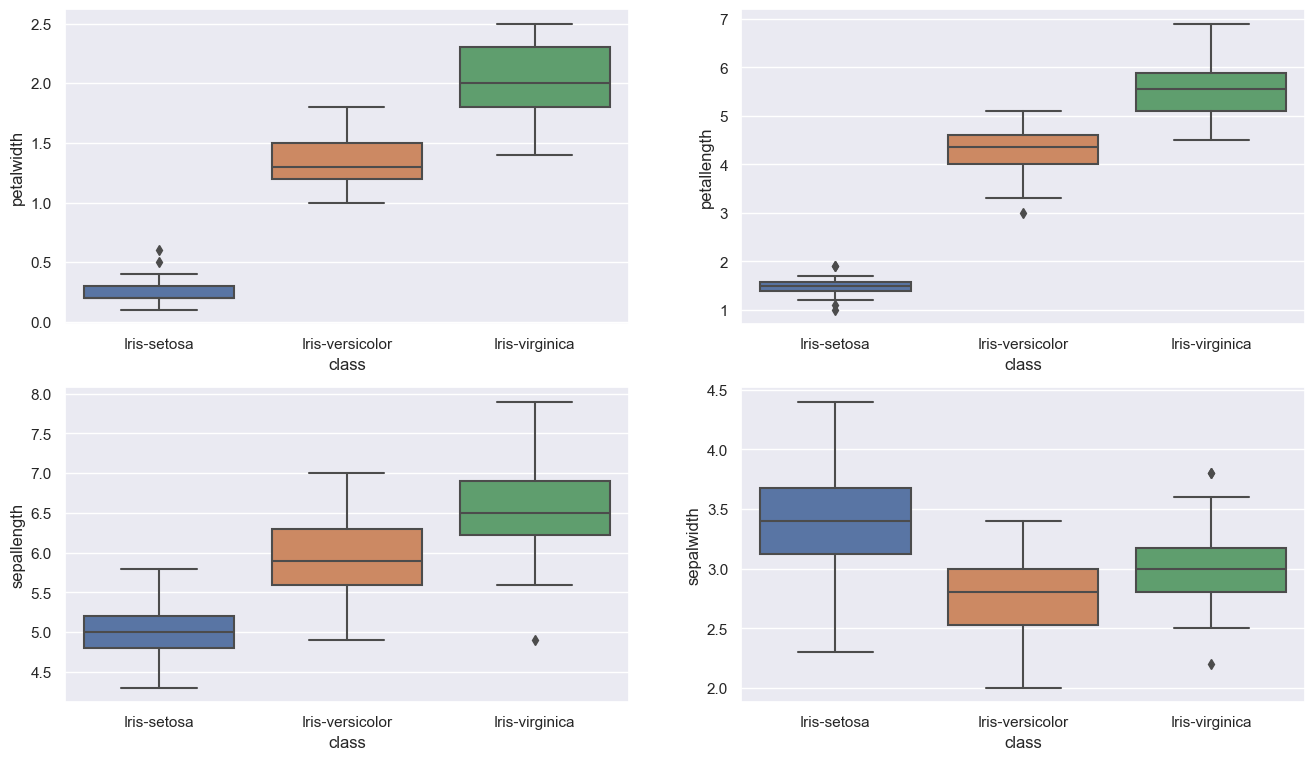

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y='petalwidth', x= 'class', data=iris_data, orient='v' , ax=axes[0, 0])
sns.boxplot( y='petallength', x= 'class', data=iris_data, orient='v' , ax=axes[0, 1])
sns.boxplot( y='sepallength', x= 'class', data=iris_data, orient='v' , ax=axes[1, 0])
sns.boxplot( y='sepalwidth', x= 'class', data=iris_data, orient='v' , ax=axes[1, 1])
plt.show()

C:\Users\Meet\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Meet\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Meet\anaconda3\lib\site

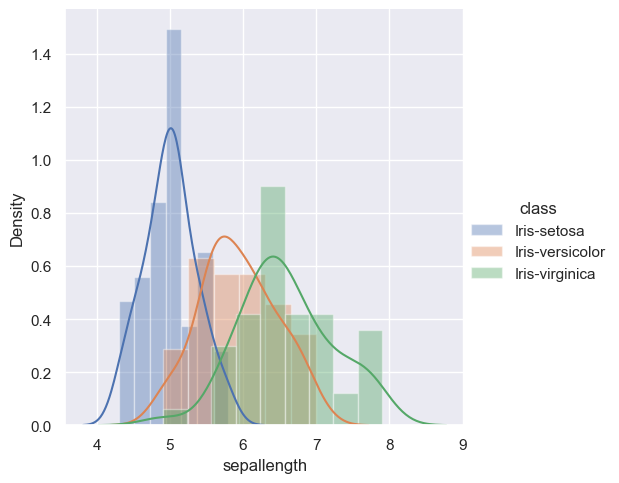

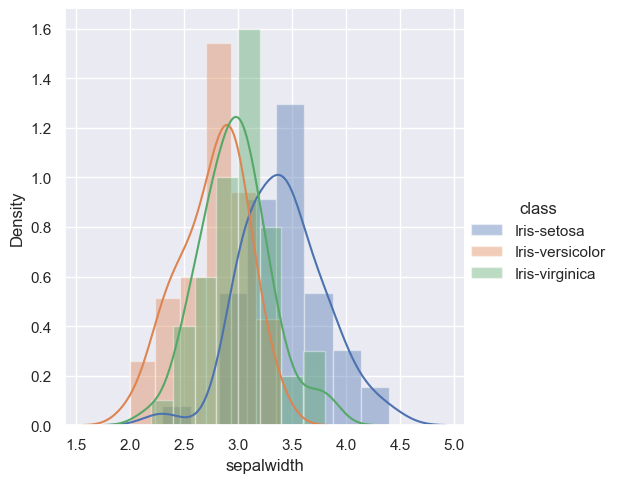

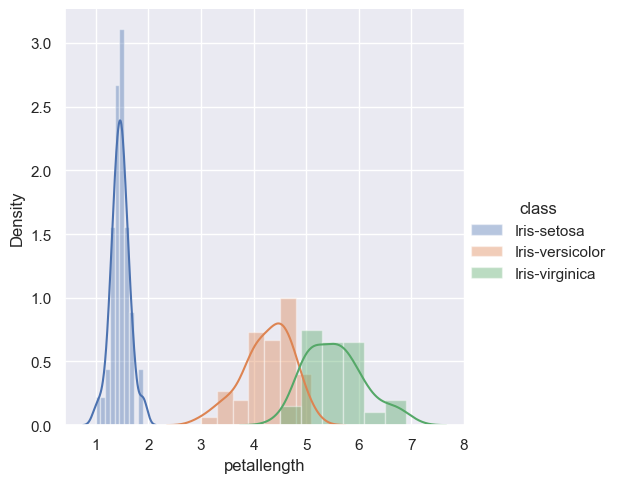

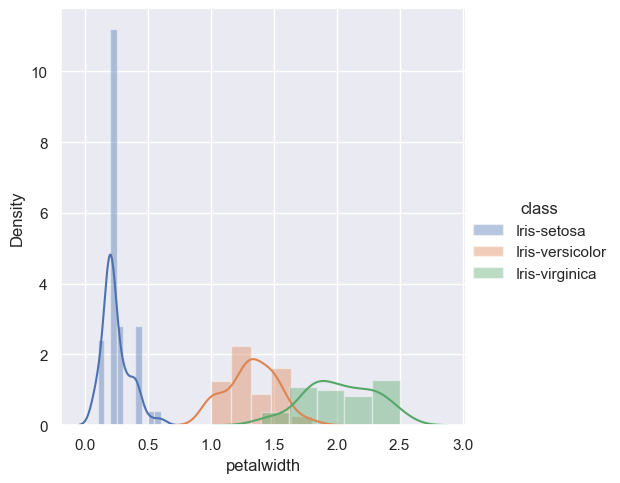

In [15]:
sns.FacetGrid(iris_data, hue='class', height=5) \
.map(sns.distplot, "sepallength") \
.add_legend()

sns.FacetGrid(iris_data, hue='class', height=5) \
.map(sns.distplot, 'sepalwidth') \
.add_legend()

sns.FacetGrid(iris_data, hue="class", height=5) \
.map(sns.distplot, "petallength") \
.add_legend()

sns.FacetGrid(iris_data, hue="class", height=5) \
.map(sns.distplot, "petalwidth") \
.add_legend()
plt.show()